In [72]:
#Import Packages and dataframe:

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

df = pd.read_csv(r'c:\Verizon.csv')

In [73]:
#Viewing first few columns of dataframe:

df.head()

,year,month,day,price,downpmt,monthdue,payment_left,monthly_payment,pmttype,credit_score,age,gender,default
0,2020,1,12,2178.85,250.00,6.0,1928.85,321.475000,4,1,0,2,0
1,2020,6,15,1543.65,1543.65,6.0,0.00,0.000000,1,0,0,2,0
2,2020,4,19,1107.67,125.00,5.0,982.67,196.534000,1,0,0,2,0
3,2020,3,17,950.44,237.61,9.0,712.83,79.203333,5,0,0,1,0
4,2020,8,21,1436.00,250.00,9.0,1186.00,131.777778,3,0,0,2,0


In [74]:
# Checking for Missing Values in Data and dropping Null Values:

for col in df.columns:
    p_missing = np.mean(ds[col].isnull())
    print('{} = {}%'.format(col, p_missing))

df = df.dropna()

year = 0.0%
month = 0.0%
day = 0.0%
price = 0.0%
downpmt = 0.0%
monthdue = 0.0%
payment_left = 0.0%
monthly_payment = 0.0%
pmttype = 0.0%
credit_score = 0.0%
age = 0.0%
gender = 0.0%
default = 0.0%


In [75]:
#Analyzing the data types for each column:

df.dtypes

year                 int64
month                int64
day                  int64
price              float64
downpmt            float64
monthdue           float64
payment_left       float64
monthly_payment    float64
pmttype              int64
credit_score         int64
age                  int64
gender               int64
default              int64
dtype: object

In [50]:
#Summary Statistics of Each of the Columns within the dataset:

summary_stats = df.describe()
print(summary_stats)

               year         month           day         price       downpmt  \
count  24833.000000  24833.000000  24833.000000  24833.000000  24833.000000   
mean    2020.601377      6.499013     13.041397   1003.756083    199.799561   
std        0.489625      3.458227      7.169510    439.278060    335.465403   
min     2020.000000      1.000000      1.000000      0.000000      0.000000   
25%     2020.000000      3.000000      7.000000    699.000000     49.000000   
50%     2021.000000      6.000000     13.000000    999.000000    100.000000   
75%     2021.000000     10.000000     19.000000   1249.000000    175.000000   
max     2021.000000     12.000000     25.000000   9371.250000   9371.250000   

           monthdue  payment_left  monthly_payment       pmttype  \
count  24833.000000  24833.000000     24833.000000  24833.000000   
mean       8.288312    803.956522       144.342202      3.093223   
std        7.109477    472.899790       190.091249      1.559949   
min        0.000

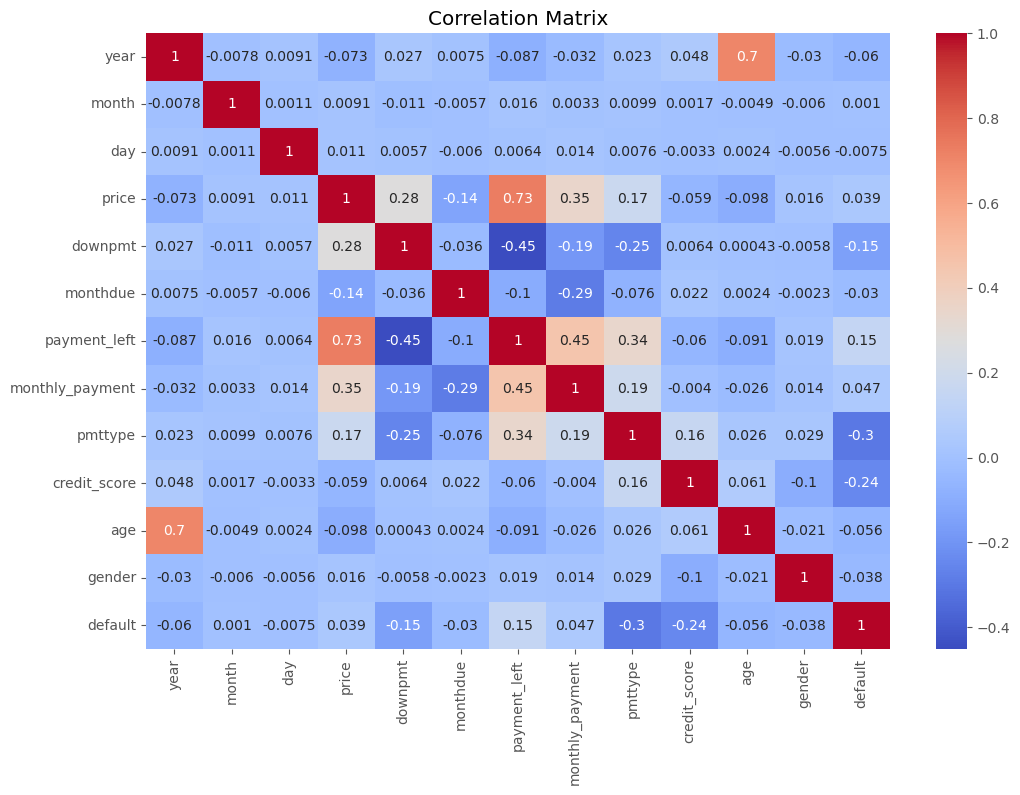

In [51]:
#Creation of Correlation Matrix between Variables:

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

0    21976
1     2857
Name: default, dtype: int64


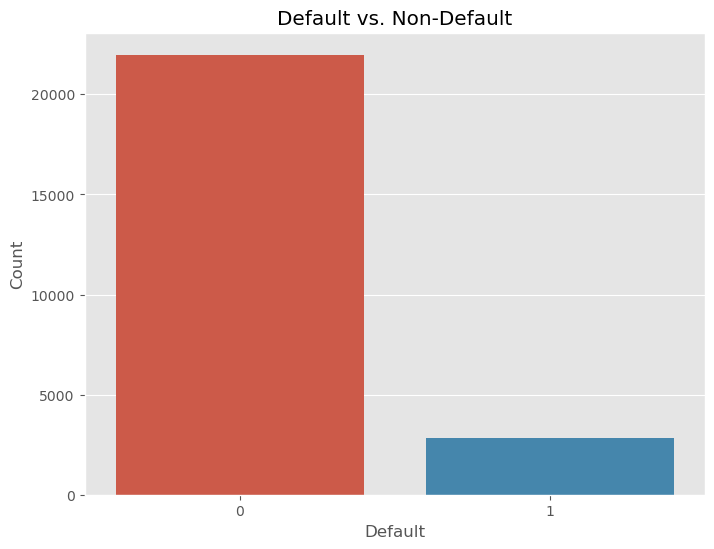

In [54]:
#Counts of Defaulting Members vs. paying Members/Visualization:

default_counts = df['default'].value_counts()
print(default_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='default', data=df)
plt.title('Default vs. Non-Default')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

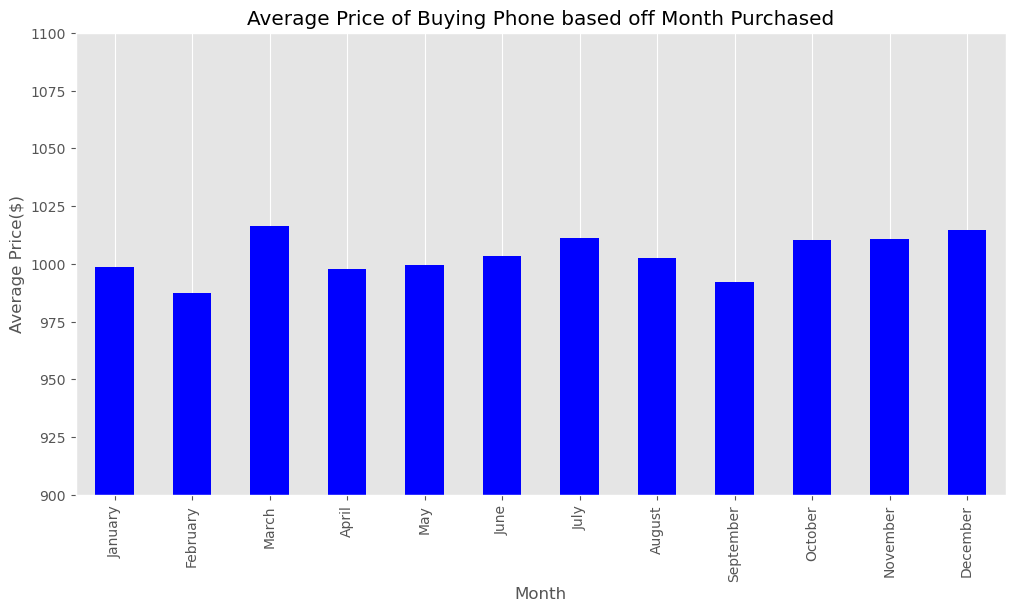

In [68]:
# Create a new column 'date' by combining 'year', 'month', and 'day'

df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

monthly_avg_price = df.groupby(df['date'].dt.strftime('%B'))['price'].mean()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg_price = monthly_avg_price.reindex(month_order)

plt.figure(figsize=(12, 6))
monthly_avg_price.plot(kind='bar', color='b')
plt.title('Average Price of Buying Phone based off Month Purchased')
plt.xlabel('Month')
plt.ylabel('Average Price($)')
plt.grid(axis='y')

plt.ylim(900, 1100)

plt.show()

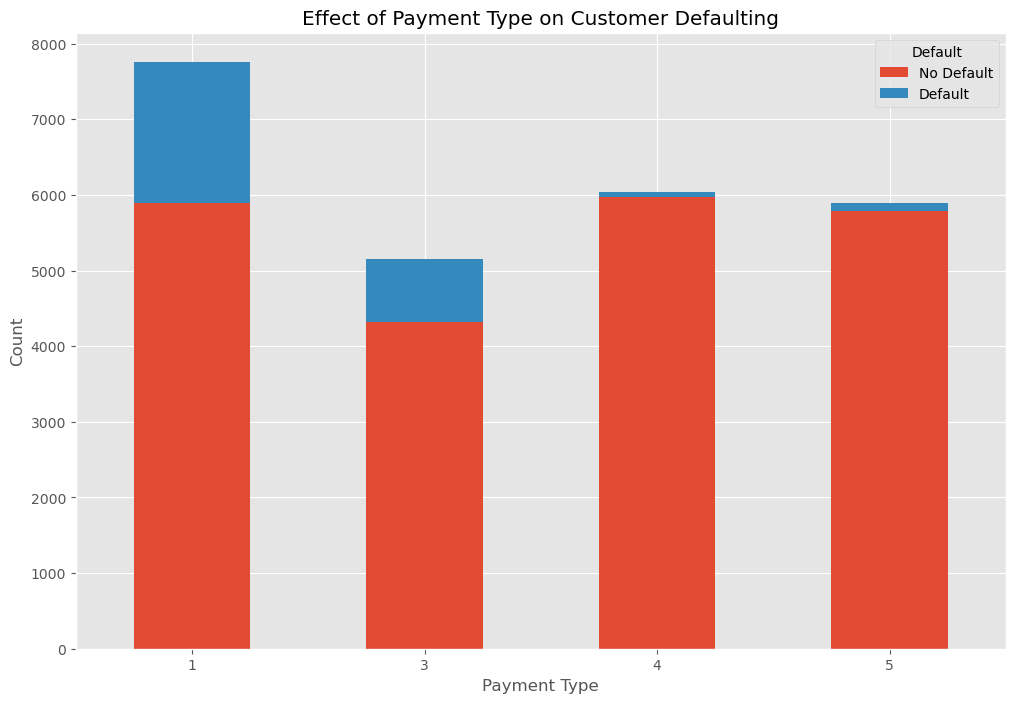

In [76]:
#Bar Chart of Payment type and Customer Default Status:

pmttype_default_analysis = df.groupby(['pmttype', 'default']).size().unstack(fill_value=0)

pmttype_default_analysis.plot(kind='bar', stacked=True)
plt.title('Effect of Payment Type on Customer Defaulting')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['No Default', 'Default'], title='Default')
plt.show()


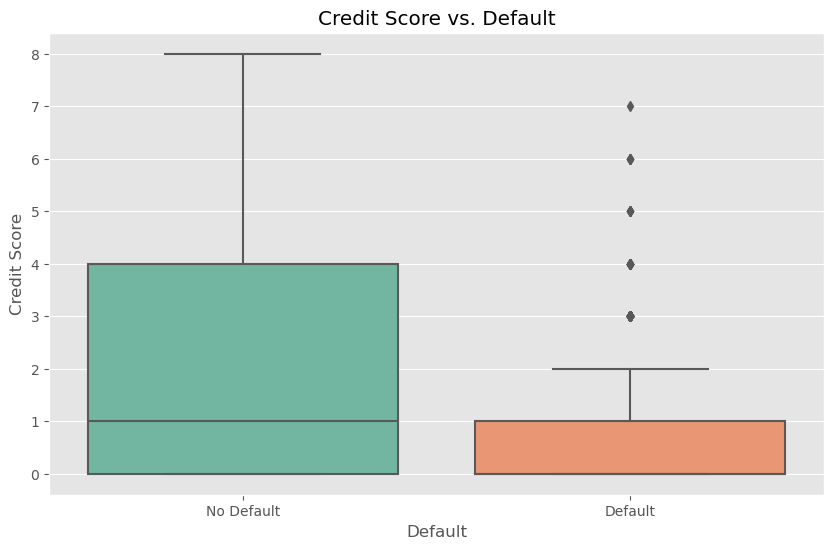

In [71]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='credit_score', data=df, palette='Set2')
plt.title('Credit Score vs. Default')
plt.xlabel('Default')
plt.ylabel('Credit Score')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.show()